<a href="https://colab.research.google.com/github/Cipher4all/Data-Science-Projects/blob/master/Stock_Market_Analytics_Hybrid_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
!pip install yfinance

In [ ]:
import yfinance
start = '2020-04-29'
end = '2021-04-29'
df_prices = pd.DataFrame(yfinance.download('^BSESN', start, end))
df_prices.to_csv('prices.csv')

[*********************100%***********************]  1 of 1 completed


# New Section

In [ ]:
df = pd.read_csv('prices.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-29,32311.039062,32897.589844,32171.650391,32720.160156,32720.160156,16000
1,2020-04-30,33381.191406,33887.250000,33354.929688,33717.621094,33717.621094,21100
2,2020-05-04,32748.140625,32748.140625,31632.019531,31715.349609,31715.349609,18300
3,2020-05-05,32182.900391,32264.000000,31403.570312,31453.509766,31453.509766,19200
4,2020-05-06,31577.630859,31970.839844,31158.750000,31685.750000,31685.750000,19200
...,...,...,...,...,...,...,...
243,2021-04-22,47501.710938,48143.160156,47204.500000,48080.671875,48080.671875,15800
244,2021-04-23,47863.808594,48265.390625,47669.550781,47878.449219,47878.449219,11200
245,2021-04-26,48197.371094,48667.980469,48152.238281,48386.511719,48386.511719,15200
246,2021-04-27,48424.078125,49009.261719,48399.531250,48944.140625,48944.140625,10100


In [ ]:
cols = ['Date','Category','News']
df_news = pd.read_csv('/content/India-news-headline.csv.txt', engine='python', names=cols)
df_news = df_news.dropna(axis = 0, how ='any') 
df_news

,Date,Category,News
0,20200101,life-style.events,Happy New Year 2020: Images; Quotes; Wishes; M...
1,20200101,city.bhubaneswar,Bone-clling cold wavecontinues to sweep state
2,20200101,city.hyderabad,T gained 163 sq km forest cover
3,20200101,city.hyderabad,Draft electoral rolls published
4,20200101,city.koc,Invasive species increasing in Kerala's core f...
...,...,...,...
90868,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
90869,20200630,entertainment.ndi.bollywood,apurva asrani calls alia bhatts mother soni ra...
90870,20200630,entertainment.ndi.bollywood,kangana ranaut gets a doll version of herself ...
90871,20200630,entertainment.ndi.bollywood,meezaan jaffrey reminisces s cldhood days with...


# Cleaning and processing data

In [ ]:
df_news.dropna(axis = 0, inplace=True)
df_news.drop('Category', axis=1, inplace=True)

In [ ]:
df_news['Date'] = pd.to_datetime(df_news['Date'], format='%Y%m%d')
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-29,32311.039062,32897.589844,32171.650391,32720.160156,32720.160156,16000
1,2020-04-30,33381.191406,33887.250000,33354.929688,33717.621094,33717.621094,21100
2,2020-05-04,32748.140625,32748.140625,31632.019531,31715.349609,31715.349609,18300
3,2020-05-05,32182.900391,32264.000000,31403.570312,31453.509766,31453.509766,19200
4,2020-05-06,31577.630859,31970.839844,31158.750000,31685.750000,31685.750000,19200
...,...,...,...,...,...,...,...
243,2021-04-22,47501.710938,48143.160156,47204.500000,48080.671875,48080.671875,15800
244,2021-04-23,47863.808594,48265.390625,47669.550781,47878.449219,47878.449219,11200
245,2021-04-26,48197.371094,48667.980469,48152.238281,48386.511719,48386.511719,15200
246,2021-04-27,48424.078125,49009.261719,48399.531250,48944.140625,48944.140625,10100


In [ ]:
df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news

,Date,News
0,2020-01-01,Happy New Year 2020: Images; Quotes; Wishes; M...
1,2020-01-02,Horoscope Today; 02 January 2020: Read predict...
2,2020-01-03,Bank Holidays in 2020 Mazya Navryac Bayko upda...
3,2020-01-04,Mamta Mohandas plays a nurse in Lalbagh Tolly ...
4,2020-01-05,Homing in on 2020 Beauty in blue Live it up in...
...,...,...
177,2020-06-26,Containment zone residents slam gh prices char...
178,2020-06-27,like me i wont let you have a toxic relationsp...
179,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
180,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


In [ ]:
# cleaning headlines
c = []
for i in range(0,len(df_news['News'])):
  news = re.sub('[^a-zA-Z]',' ',df_news['News'][i])
  news =  news.lower()
  news = news.split()
  news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
  news = ' '.join(news)
  c.append(news)

In [ ]:
df_news['News'] = pd.Series(c)
df_news

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,News
0,2020-01-01,happi new year imag quot wish messag card gree...
1,2020-01-02,horoscop today januari read predict ari tauru ...
2,2020-01-03,bank holiday mazya navryac bayko updat januari...
3,2020-01-04,mamta mohanda play nurs lalbagh tolli celeb op...
4,2020-01-05,home beauti blue live diet induc sound sleep y...
...,...,...
177,2020-06-26,contain zone resid slam gh price charg veget v...
178,2020-06-27,like wont let toxic relationsp food major ravi...
179,2020-06-28,atanu ghosh plan rewrit old script make relev ...
180,2020-06-29,hot stylish bikini look katrina kaif anna eden...


# Calculating Subjectivity and Polarity scores using TextBlob module:¶

In [ ]:
def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df_news['Subjectivity'] = df_news['News'].apply(subjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,News,Subjectivity,Polarity
0,2020-01-01,happi new year imag quot wish messag card gree...,0.407509,0.040729
1,2020-01-02,horoscop today januari read predict ari tauru ...,0.410638,0.078692
2,2020-01-03,bank holiday mazya navryac bayko updat januari...,0.370711,0.085875
3,2020-01-04,mamta mohanda play nurs lalbagh tolli celeb op...,0.389496,0.126830
4,2020-01-05,home beauti blue live diet induc sound sleep y...,0.350895,0.093071
...,...,...,...,...
177,2020-06-26,contain zone resid slam gh price charg veget v...,0.324106,0.066983
178,2020-06-27,like wont let toxic relationsp food major ravi...,0.371791,0.063043
179,2020-06-28,atanu ghosh plan rewrit old script make relev ...,0.368076,0.054104
180,2020-06-29,hot stylish bikini look katrina kaif anna eden...,0.370906,0.061918


# Sentiment analysis on news headline

In [ ]:
sia = SentimentIntensityAnalyzer()
df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]
df_news

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2020-01-01,happi new year imag quot wish messag card gree...,0.407509,0.040729,-0.9998,0.151,0.777,0.072
1,2020-01-02,horoscop today januari read predict ari tauru ...,0.410638,0.078692,-0.9998,0.155,0.766,0.079
2,2020-01-03,bank holiday mazya navryac bayko updat januari...,0.370711,0.085875,-0.9994,0.122,0.790,0.088
3,2020-01-04,mamta mohanda play nurs lalbagh tolli celeb op...,0.389496,0.126830,-0.9998,0.146,0.780,0.074
4,2020-01-05,home beauti blue live diet induc sound sleep y...,0.350895,0.093071,-0.9999,0.156,0.772,0.072
...,...,...,...,...,...,...,...,...
177,2020-06-26,contain zone resid slam gh price charg veget v...,0.324106,0.066983,-0.9998,0.142,0.790,0.068
178,2020-06-27,like wont let toxic relationsp food major ravi...,0.371791,0.063043,-0.9998,0.139,0.791,0.070
179,2020-06-28,atanu ghosh plan rewrit old script make relev ...,0.368076,0.054104,-0.9998,0.135,0.801,0.064
180,2020-06-29,hot stylish bikini look katrina kaif anna eden...,0.370906,0.061918,-0.9998,0.130,0.800,0.069


In [ ]:
df_merge = pd.merge(df, df_news, how='inner', on='Date')
df_merge.drop('Date', axis=1, inplace=True)
df_merge.drop('News', axis=1, inplace=True)
print(df_merge.columns)
print(len(df_merge))
print(len(df_news))
print(len(df))

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Subjectivity',
       'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive'],
      dtype='object')
43
182
248


In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df1 = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df1.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df1.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
values = df_merge.values
print(df_merge)
print(values)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
reframed  = series_to_supervised(scaled,1,1)
reframed.drop(reframed.columns[[12,13,14,16,17,18,19,20,21,22,23]], axis=1, inplace=True)
print(reframed.columns)

            Open          High           Low  ...  Negative  Neutral  Positive
0   32311.039062  32897.589844  32171.650391  ...     0.103    0.810     0.087
1   33381.191406  33887.250000  33354.929688  ...     0.108    0.812     0.079
2   32748.140625  32748.140625  31632.019531  ...     0.111    0.829     0.060
3   32182.900391  32264.000000  31403.570312  ...     0.097    0.835     0.068
4   31577.630859  31970.839844  31158.750000  ...     0.105    0.816     0.078
5   31677.689453  31705.250000  31362.869141  ...     0.113    0.808     0.078
6   32083.320312  32088.509766  31598.000000  ...     0.121    0.813     0.066
7   32030.339844  32301.580078  31500.869141  ...     0.122    0.802     0.076
8   31342.929688  31536.890625  30844.660156  ...     0.113    0.809     0.077
9   32841.871094  32845.480469  31901.919922  ...     0.104    0.832     0.064
10  31466.330078  31630.939453  31052.650391  ...     0.120    0.806     0.075
11  31296.279297  31296.279297  30770.480469  ...   

# Building a LSTM (Long Short Term Memory) Model to predict Stock Prices:


In [ ]:
values = reframed.values
print((values).shape)
n_train_hours = 30 
train = values[:n_train_hours,:]
test = values[n_train_hours:,:]
train_X, train_Y = train[:, :-1], train[:, -1]
test_X, test_Y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0],1,train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0],1,test_X.shape[1]))
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(42, 13)
(30, 1, 12) (30,) (12, 1, 12) (12,)


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: list index out of range
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: list index out of range
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: list index out of range
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

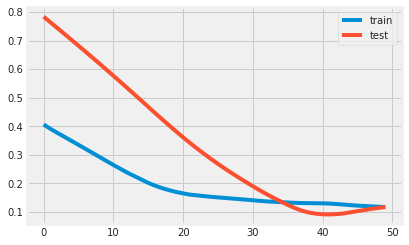

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

history = model.fit(train_X, train_Y, epochs=50, batch_size=72, validation_data=(test_X, test_Y), verbose=2, shuffle=False)

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
test_X.shape

(12, 1, 12)

In [ ]:
# make a prediction
print(test_X.shape)
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[2]))
print(test_X.shape)

(12, 1, 12)
(12, 1, 12)


In [ ]:
yhat = model.predict(test_X)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: list index out of range
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: list index out of range
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
test_X

array([[0.41250706, 0.6274543 , 0.48152637, 0.69461155, 0.69461155,
        0.05704506, 0.71825314, 0.5983269 , 0.0526123 , 0.7142856 ,
        0.37878895, 0.53846157],
       [0.63602686, 0.5900607 , 0.5980077 , 0.5924001 , 0.5924001 ,
        0.03080434, 0.56394887, 0.88586307, 0.        , 0.9464288 ,
        0.21212101, 0.48717964],
       [0.6692085 , 0.6608257 , 0.6039901 , 0.6620884 , 0.6620884 ,
        0.08214489, 0.43616676, 0.5512788 , 0.        , 1.        ,
        0.10606098, 0.56410265],
       [0.59395504, 0.64303637, 0.68081474, 0.6440754 , 0.6440754 ,
        0.04107245, 0.5720022 , 0.8285171 , 0.15789795, 0.5       ,
        0.409091  , 0.7948719 ],
       [0.5818558 , 0.71196747, 0.6886172 , 0.77369404, 0.77369404,
        0.04677696, 0.8781929 , 0.84803724, 0.10528564, 0.5892856 ,
        0.48484898, 0.53846157],
       [0.7564635 , 0.8272095 , 0.84339   , 0.870646  , 0.870646  ,
        0.08499715, 1.        , 0.6864541 , 0.        , 0.9464288 ,
        0.19696999,

In [ ]:
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)

In [ ]:
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [ ]:
test_Y = test_Y.reshape((len(test_Y), 1))
test_Y

array([[0.5924001 ],
       [0.6620884 ],
       [0.6440754 ],
       [0.77369404],
       [0.870646  ],
       [0.9038944 ],
       [1.        ],
       [0.8960557 ],
       [0.8910794 ],
       [0.95202017],
       [0.913188  ],
       [0.90472364]], dtype=float32)

In [ ]:
inv_y = np.concatenate((test_Y, test_X[:, 1:]), axis=1)

In [ ]:
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 762.167
